In [ ]:
!pip install spacy 

In [ ]:
import spacy 
nlp=spacy.load('en')  
from spacy import displacy
from spacy.matcher import PhraseMatcher

In [ ]:
doc=nlp(open('/content/AllTickets.csv',encoding='utf8').read()) 
print(doc)

title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
,hi since recruiter lead permission approve requisitions makes please make thanks recruiter,1,4,2,21,71,3,4
connection with icon,icon dear please setup icon per icon engineers please let other details needed thanks lead,1,6,22,7,26,3,4
work experience user,work experience user hi work experience student coming next his name much appreciate him duration thank,1,5,13,7,32,3,4
requesting for meeting,requesting meeting hi please help follow equipments cable pc cord plug,1,5,13,7,32,3,4
reset passwords for external accounts,re expire days hi ask help update passwords colleagues thank pm expire days importance high hi received about expiration please kindly help prolongation best regards pm expire days importance high dear expire days order change please follow steps prerequisites disable device credentials close active connected by cable machine note also follow steps detailed press ctrl alt delete s

In [ ]:
dir(doc)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_py_tokens',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_byte

In [ ]:
doc[0]

title

In [ ]:
list(doc.sents)

[title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
 ,,
 hi since recruiter lead permission,
 approve requisitions makes please make thanks,
 recruiter,1,4,2,21,71,3,4
 connection with icon,
 ,icon dear please setup icon per icon engineers please let other details needed thanks lead,1,6,22,7,26,3,4,
 work experience user,work experience,
 user hi work experience student coming next his name much appreciate him duration thank,1,5,13,7,32,3,4,
 requesting for meeting,requesting meeting hi,
 please help follow equipments cable pc cord plug,1,5,13,7,32,3,4
 reset passwords for external accounts,re expire days hi ask help update passwords colleagues thank,
 pm expire days importance high,
 hi received about expiration,
 please kindly help prolongation best regards,
 pm expire days importance,
 high dear expire days order change please follow steps prerequisites,
 disable device credentials close active connected by cable machine note also follow step

In [ ]:
[(token.text,token.pos_,token.dep_) for token in doc]


[('title', 'NOUN', 'ROOT'),
 (',', 'PUNCT', 'punct'),
 ('body', 'NOUN', 'conj'),
 (',', 'PUNCT', 'punct'),
 ('ticket_type', 'PROPN', 'conj'),
 (',', 'PUNCT', 'punct'),
 ('category', 'NOUN', 'conj'),
 (',', 'PUNCT', 'punct'),
 ('sub_category1,sub_category2,business_service', 'NOUN', 'conj'),
 (',', 'PUNCT', 'punct'),
 ('urgency', 'NOUN', 'conj'),
 (',', 'PUNCT', 'punct'),
 ('impact', 'NOUN', 'conj'),
 ('\n', 'SPACE', ''),
 (',', 'PUNCT', 'punct'),
 ('hi', 'INTJ', 'ROOT'),
 ('since', 'SCONJ', 'mark'),
 ('recruiter', 'NOUN', 'nsubj'),
 ('lead', 'NOUN', 'advcl'),
 ('permission', 'NOUN', 'dobj'),
 ('approve', 'VERB', 'ROOT'),
 ('requisitions', 'NOUN', 'nsubj'),
 ('makes', 'VERB', 'ccomp'),
 ('please', 'INTJ', 'intj'),
 ('make', 'VERB', 'xcomp'),
 ('thanks', 'NOUN', 'dobj'),
 ('recruiter,1,4,2,21,71,3,4', 'ADJ', 'nmod'),
 ('\n', 'SPACE', ''),
 ('connection', 'NOUN', 'ROOT'),
 ('with', 'ADP', 'prep'),
 ('icon', 'NOUN', 'pobj'),
 (',', 'PUNCT', 'punct'),
 ('icon', 'NOUN', 'nmod'),
 ('dear', 'N

In [ ]:
doc.text.split(' ')


['title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact\n,hi',
 'since',
 'recruiter',
 'lead',
 'permission',
 'approve',
 'requisitions',
 'makes',
 'please',
 'make',
 'thanks',
 'recruiter,1,4,2,21,71,3,4\nconnection',
 'with',
 'icon,icon',
 'dear',
 'please',
 'setup',
 'icon',
 'per',
 'icon',
 'engineers',
 'please',
 'let',
 'other',
 'details',
 'needed',
 'thanks',
 'lead,1,6,22,7,26,3,4\nwork',
 'experience',
 'user,work',
 'experience',
 'user',
 'hi',
 'work',
 'experience',
 'student',
 'coming',
 'next',
 'his',
 'name',
 'much',
 'appreciate',
 'him',
 'duration',
 'thank,1,5,13,7,32,3,4\nrequesting',
 'for',
 'meeting,requesting',
 'meeting',
 'hi',
 'please',
 'help',
 'follow',
 'equipments',
 'cable',
 'pc',
 'cord',
 'plug,1,5,13,7,32,3,4\nreset',
 'passwords',
 'for',
 'external',
 'accounts,re',
 'expire',
 'days',
 'hi',
 'ask',
 'help',
 'update',
 'passwords',
 'colleagues',
 'thank',
 'pm',
 'expire',
 'days',
 'importan

In [ ]:
[{num,sentence} for num,sentence in enumerate(doc.sents)]


[{0,
  title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
  ,},
 {1, hi since recruiter lead permission},
 {2, approve requisitions makes please make thanks},
 {3, recruiter,1,4,2,21,71,3,4
  connection with icon},
 {,icon dear please setup icon per icon engineers please let other details needed thanks lead,1,6,22,7,26,3,4,
  4},
 {5, work experience user,work experience},
 {6,
  user hi work experience student coming next his name much appreciate him duration thank,1,5,13,7,32,3,4},
 {7, requesting for meeting,requesting meeting hi},
 {8, please help follow equipments cable pc cord plug,1,5,13,7,32,3,4
  reset passwords for external accounts,re expire days hi ask help update passwords colleagues thank},
 {9, pm expire days importance high},
 {10, hi received about expiration},
 {11, please kindly help prolongation best regards},
 {12, pm expire days importance},
 {13, high dear expire days order change please follow steps prerequisites},
 {14,


In [ ]:
[(token,token.tag_) for token in doc] 

[(title, 'NN'),
 (,, ','),
 (body, 'NN'),
 (,, ','),
 (ticket_type, 'NNP'),
 (,, ','),
 (category, 'NN'),
 (,, ','),
 (sub_category1,sub_category2,business_service, 'NN'),
 (,, ','),
 (urgency, 'NN'),
 (,, ','),
 (impact, 'NN'),
 (, '_SP'),
 (,, ','),
 (hi, 'UH'),
 (since, 'IN'),
 (recruiter, 'NN'),
 (lead, 'NN'),
 (permission, 'NN'),
 (approve, 'VBP'),
 (requisitions, 'NNS'),
 (makes, 'VBZ'),
 (please, 'UH'),
 (make, 'VB'),
 (thanks, 'NNS'),
 (recruiter,1,4,2,21,71,3,4, 'JJ'),
 (, '_SP'),
 (connection, 'NN'),
 (with, 'IN'),
 (icon, 'NN'),
 (,, ','),
 (icon, 'NN'),
 (dear, 'NN'),
 (please, 'UH'),
 (setup, 'VB'),
 (icon, 'NN'),
 (per, 'IN'),
 (icon, 'NN'),
 (engineers, 'NNS'),
 (please, 'UH'),
 (let, 'VB'),
 (other, 'JJ'),
 (details, 'NNS'),
 (needed, 'VBD'),
 (thanks, 'NNS'),
 (lead,1,6,22,7,26,3,4, 'VB'),
 (, '_SP'),
 (work, 'NN'),
 (experience, 'NN'),
 (user, 'NN'),
 (,, ','),
 (work, 'NN'),
 (experience, 'NN'),
 (user, 'NN'),
 (hi, 'UH'),
 (work, 'NN'),
 (experience, 'NN'),
 (studen

In [ ]:
[(token.text,token.pos_,token.tag_,token.dep_,token.lemma_,token.is_alpha,token.is_stop) for token in doc] 

[('title', 'NOUN', 'NN', 'ROOT', 'title', True, False),
 (',', 'PUNCT', ',', 'punct', ',', False, False),
 ('body', 'NOUN', 'NN', 'conj', 'body', True, False),
 (',', 'PUNCT', ',', 'punct', ',', False, False),
 ('ticket_type', 'PROPN', 'NNP', 'conj', 'ticket_type', False, False),
 (',', 'PUNCT', ',', 'punct', ',', False, False),
 ('category', 'NOUN', 'NN', 'conj', 'category', True, False),
 (',', 'PUNCT', ',', 'punct', ',', False, False),
 ('sub_category1,sub_category2,business_service',
  'NOUN',
  'NN',
  'conj',
  'sub_category1,sub_category2,business_service',
  False,
  False),
 (',', 'PUNCT', ',', 'punct', ',', False, False),
 ('urgency', 'NOUN', 'NN', 'conj', 'urgency', True, False),
 (',', 'PUNCT', ',', 'punct', ',', False, False),
 ('impact', 'NOUN', 'NN', 'conj', 'impact', True, False),
 ('\n', 'SPACE', '_SP', '', '\n', False, False),
 (',', 'PUNCT', ',', 'punct', ',', False, False),
 ('hi', 'INTJ', 'UH', 'ROOT', 'hi', True, False),
 ('since', 'SCONJ', 'IN', 'mark', 'since', 

In [ ]:
[(ent.text,ent.start_char,ent.end_char,ent.label_) for ent in doc.ents] 

[('sub_category1,sub_category2,business_service', 32, 76, 'DATE'),
 ('icon', 216, 220, 'ORG'),
 ('icon', 221, 225, 'ORG'),
 ('days', 627, 631, 'DATE'),
 ('pm', 678, 680, 'PERSON'),
 ('days', 688, 692, 'DATE'),
 ('days', 826, 830, 'DATE'),
 ('prod servers tunneling', 1801, 1823, 'PERSON'),
 ('prod tunneling va', 1824, 1841, 'PERSON'),
 ('la', 1866, 1868, 'GPE'),
 ('tuesday', 2006, 2013, 'DATE'),
 ('pm acre', 2014, 2021, 'PERSON'),
 ('pm acre', 2038, 2045, 'PERSON'),
 ('pm acre', 2165, 2172, 'PERSON'),
 ('la tunneling', 2195, 2207, 'FAC'),
 ('friday', 2224, 2230, 'DATE'),
 ('pm', 2231, 2233, 'TIME'),
 ('two', 3094, 3097, 'CARDINAL'),
 ('weekly', 3213, 3219, 'DATE'),
 ('friday', 3231, 3237, 'DATE'),
 ('laptop', 3536, 3542, 'PERSON'),
 ('tray tray copier details', 3815, 3839, 'ORG'),
 ('tray', 3849, 3853, 'ORG'),
 ('zone', 3964, 3968, 'ORG'),
 ('secondary', 4402, 4411, 'ORDINAL'),
 ('secondary', 4440, 4449, 'ORDINAL')]

In [ ]:
[(word,word.lemma_) for word in doc]


[(title, 'title'),
 (,, ','),
 (body, 'body'),
 (,, ','),
 (ticket_type, 'ticket_type'),
 (,, ','),
 (category, 'category'),
 (,, ','),
 (sub_category1,sub_category2,business_service,
  'sub_category1,sub_category2,business_service'),
 (,, ','),
 (urgency, 'urgency'),
 (,, ','),
 (impact, 'impact'),
 (, '\n'),
 (,, ','),
 (hi, 'hi'),
 (since, 'since'),
 (recruiter, 'recruiter'),
 (lead, 'lead'),
 (permission, 'permission'),
 (approve, 'approve'),
 (requisitions, 'requisition'),
 (makes, 'make'),
 (please, 'please'),
 (make, 'make'),
 (thanks, 'thank'),
 (recruiter,1,4,2,21,71,3,4, 'recruiter,1,4,2,21,71,3,4'),
 (, '\n'),
 (connection, 'connection'),
 (with, 'with'),
 (icon, 'icon'),
 (,, ','),
 (icon, 'icon'),
 (dear, 'dear'),
 (please, 'please'),
 (setup, 'setup'),
 (icon, 'icon'),
 (per, 'per'),
 (icon, 'icon'),
 (engineers, 'engineer'),
 (please, 'please'),
 (let, 'let'),
 (other, 'other'),
 (details, 'detail'),
 (needed, 'need'),
 (thanks, 'thank'),
 (lead,1,6,22,7,26,3,4, 'lead,1,

In [ ]:
[(token.text,token.has_vector,token.vector_norm,token.is_oov) for token in doc] 

[('title', True, 19.02144, True),
 (',', True, 21.872078, True),
 ('body', True, 20.14733, True),
 (',', True, 20.752932, True),
 ('ticket_type', True, 20.373646, True),
 (',', True, 22.379095, True),
 ('category', True, 18.721062, True),
 (',', True, 20.835257, True),
 ('sub_category1,sub_category2,business_service', True, 17.328856, True),
 (',', True, 22.284098, True),
 ('urgency', True, 22.587603, True),
 (',', True, 22.459572, True),
 ('impact', True, 19.21878, True),
 ('\n', True, 18.817286, True),
 (',', True, 21.164639, True),
 ('hi', True, 19.590351, True),
 ('since', True, 19.903296, True),
 ('recruiter', True, 17.673264, True),
 ('lead', True, 17.587255, True),
 ('permission', True, 20.155508, True),
 ('approve', True, 18.903145, True),
 ('requisitions', True, 22.141703, True),
 ('makes', True, 22.740202, True),
 ('please', True, 21.331419, True),
 ('make', True, 22.5611, True),
 ('thanks', True, 20.185719, True),
 ('recruiter,1,4,2,21,71,3,4', True, 18.29451, True),
 ('\n',

In [ ]:
entities=[(i,i.label_,i.label) for i in doc.ents] 
entities

[(sub_category1,sub_category2,business_service, 'DATE', 391),
 (icon, 'ORG', 383),
 (icon, 'ORG', 383),
 (days, 'DATE', 391),
 (pm, 'PERSON', 380),
 (days, 'DATE', 391),
 (days, 'DATE', 391),
 (prod servers tunneling, 'PERSON', 380),
 (prod tunneling va, 'PERSON', 380),
 (la, 'GPE', 384),
 (tuesday, 'DATE', 391),
 (pm acre, 'PERSON', 380),
 (pm acre, 'PERSON', 380),
 (pm acre, 'PERSON', 380),
 (la tunneling, 'FAC', 9191306739292312949),
 (friday, 'DATE', 391),
 (pm, 'TIME', 392),
 (two, 'CARDINAL', 397),
 (weekly, 'DATE', 391),
 (friday, 'DATE', 391),
 (laptop, 'PERSON', 380),
 (tray tray copier details, 'ORG', 383),
 (tray, 'ORG', 383),
 (zone, 'ORG', 383),
 (secondary, 'ORDINAL', 396),
 (secondary, 'ORDINAL', 396)]

In [ ]:
displacy.render(doc,style="ent",jupyter=True)


In [ ]:
entities=[(i,i.label_,i.label) for i in doc.sents]
print(entities) 
displacy.render(doc,style="dep",jupyter=True) 

[(title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
,, '', 0), (hi since recruiter lead permission, '', 0), (approve requisitions makes please make thanks, '', 0), (recruiter,1,4,2,21,71,3,4
connection with icon, '', 0), (,icon dear please setup icon per icon engineers please let other details needed thanks lead,1,6,22,7,26,3,4
, '', 0), (work experience user,work experience, '', 0), (user hi work experience student coming next his name much appreciate him duration thank,1,5,13,7,32,3,4
, '', 0), (requesting for meeting,requesting meeting hi, '', 0), (please help follow equipments cable pc cord plug,1,5,13,7,32,3,4
reset passwords for external accounts,re expire days hi ask help update passwords colleagues thank, '', 0), (pm expire days importance high, '', 0), (hi received about expiration, '', 0), (please kindly help prolongation best regards, '', 0), (pm expire days importance, '', 0), (high dear expire days order change please follow steps 

In [ ]:
keyset=['device','account','wifi','network']
key_set=[nlp(text) for text in (keyset)] 
matcher=PhraseMatcher(nlp.vocab) 
matcher.add('body',None,*key_set) 
doc=nlp(doc.text) 
matches=matcher(doc) 
for match_id,start,end in matches:
  rule_id=nlp.vocab.strings[match_id]
  span=doc[start:end]
  print(span.text,start,end) 

device 131 132
device 549 550
device 560 561
device 580 581
device 600 601
device 646 647
device 649 650


In [ ]:
for token in doc:
  if not token.is_stop:    
    print(token) 

title
,
body
,
ticket_type
,
category
,
sub_category1,sub_category2,business_service
,
urgency
,
impact


,
hi
recruiter
lead
permission
approve
requisitions
makes
thanks
recruiter,1,4,2,21,71,3,4


connection
icon
,
icon
dear
setup
icon
icon
engineers
let
details
needed
thanks
lead,1,6,22,7,26,3,4


work
experience
user
,
work
experience
user
hi
work
experience
student
coming
appreciate
duration
thank,1,5,13,7,32,3,4


requesting
meeting
,
requesting
meeting
hi
help
follow
equipments
cable
pc
cord
plug,1,5,13,7,32,3,4


reset
passwords
external
accounts
,
expire
days
hi
ask
help
update
passwords
colleagues
thank
pm
expire
days
importance
high
hi
received
expiration
kindly
help
prolongation
best
regards
pm
expire
days
importance
high
dear
expire
days
order
change
follow
steps
prerequisites
disable
device
credentials
close
active
connected
cable
machine
note
follow
steps
detailed
press
ctrl
alt
delete
pops
change
item
enter
format
enter
enter
newly
chosen
enter
submit
displaying
changed

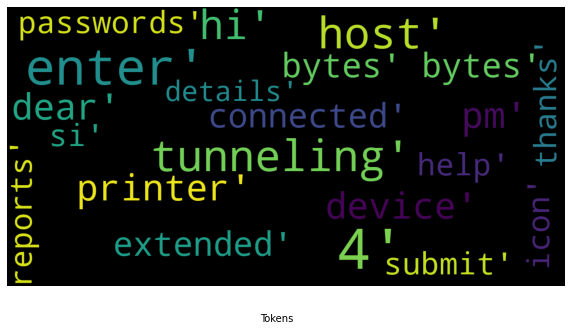

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tokens=[(token.text) for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
wordcloud=WordCloud(background_color='black',max_words=20,max_font_size=40,scale=3,random_state=
1).generate(str(tokens))
fig=plt.figure(1,figsize=(10,10))
plt.axis('off')
fig.suptitle("Tokens", fontsize=10)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud)
plt.show() 

In [ ]:
from collections import Counter
words = [token.text for token in doc
if not token.is_stop and not token.is_punct and not token.is_space and token.lemma_ != '-PRON-']
word_freq = Counter(words)
common_words = word_freq.most_common(20)
print(common_words) 

[('enter', 14), ('bytes', 11), ('tunneling', 10), ('host', 10), ('hi', 9), ('dear', 7), ('pm', 7), ('device', 7), ('la', 7), ('printer', 7), ('connected', 6), ('extended', 6), ('thanks', 5), ('icon', 5), ('help', 5), ('passwords', 5), ('expire', 5), ('days', 5), ('regards', 5), ('submit', 5)]


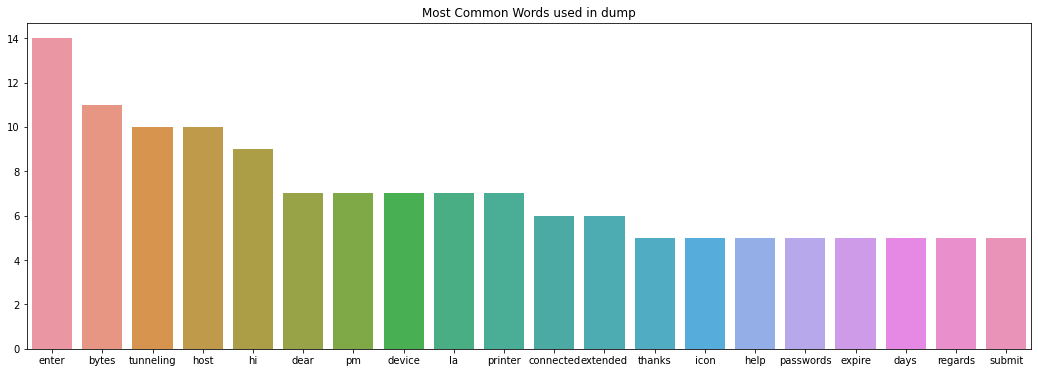

In [ ]:
#Import library 
import seaborn as sns 

# Fetch common words along with their frequency 
INFO_common_words = [word[0] for word in word_freq.most_common(20)]
INFO_common_counts = [word[1] for word in word_freq.most_common(20)]

#Plot the words vs their frequency 
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in dump')
plt.show() 

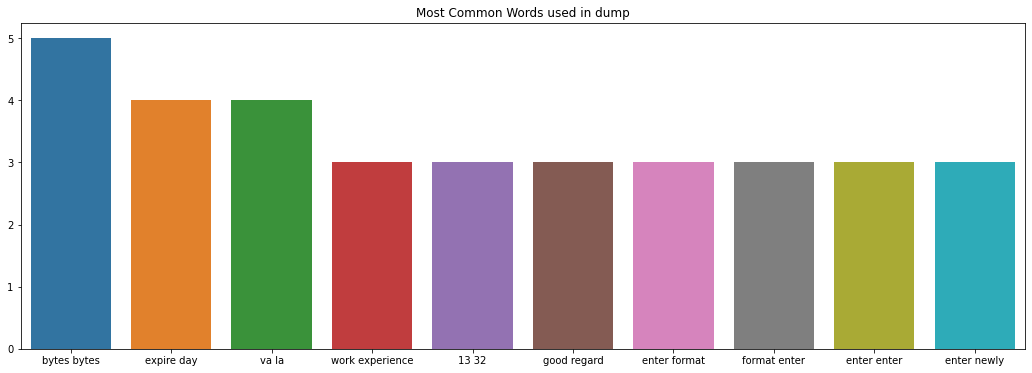

In [ ]:
#Function to extract bigrams with their frequency 
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Function to fetch common words
texts=[]
tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-' and not tok.is_stop and not
tok.is_punct and not tok.is_space]
tokens = ' '.join(tokens)
texts.append(tokens)
common_words = get_top_n_bigram(texts, 10)

#Store words and their frequency
INFO_common_words = [item[0] for item in common_words] 
INFO_common_counts = [item[1] for item in common_words]

#Plot the graph
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in dump')
plt.show() 

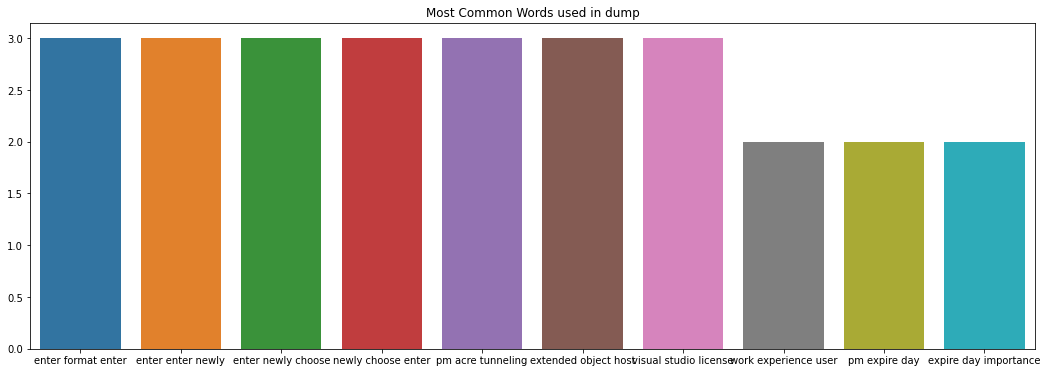

In [ ]:
#Function to extract trigrams with their frequency 
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Fetch common words
common_words = get_top_n_trigram(texts, 10)

#Fetch common words with their frequency
INFO_common_words = [item[0] for item in common_words]
INFO_common_counts = [item[1] for item in common_words]

#Plot the graph
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts) 
plt.title('Most Common Words used in dump')
plt.show() 